In [7]:
import matplotlib.pyplot as plt
import base.gradient
import base.object
import base.hamiltonian
import numpy as np
import tqix as tq
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
n_row = 2
n_column = 3
num_qubits = n_row * n_column
thetas = np.random.rand(2 * num_qubits)
thetas = thetas.astype(np.complex128)
h1 = base.hamiltonian.h1_2D(n_row, n_column, thetas)
print(h1)

[[11.05485328+0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  3.46957047+0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.97027036+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 ...
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.97027036+0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   3.46957047+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j 11.05485328+0.j]]


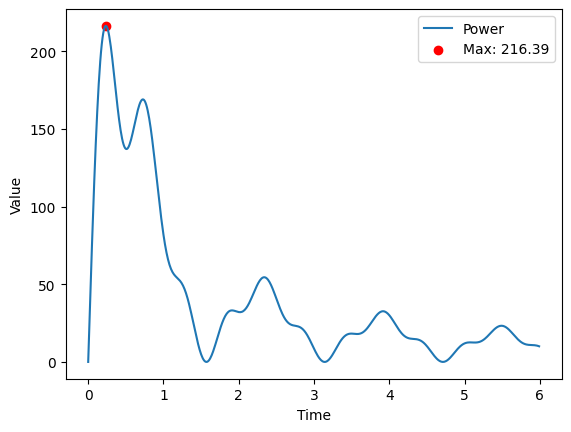

In [103]:
t = 6
delta_t = 0.01
n_row = 2
n_column = 2
num_qubits = n_row * n_column

# ltime, arP, arW = test(num_qubits, t, h1, shots=1024)

# max_value = np.max(arP)
# max_index = np.argmax(arP)
# max_time = ltime[max_index]
thetas = np.ones(2 * num_qubits)
h1 = base.hamiltonian.h1_2D(n_row, n_column, thetas)
Ps, Pmax, tmax = base.object.Ps_2D(h1, t, delta_t)
plt.plot(np.arange(0,t, delta_t), Ps, label="Power")
plt.xlabel("Time")
plt.ylabel("Value")
plt.scatter(tmax, Pmax, color="red", label=f"Max: {np.round(Pmax, 2)}")
plt.legend()
plt.show()

In [83]:
_, Pmax, tmax = base.gradient.find_Pmax_2D(h1, t = 6, delta_t = 0.001)
print(Pmax, tmax)
    

7250.03685827532 0.068


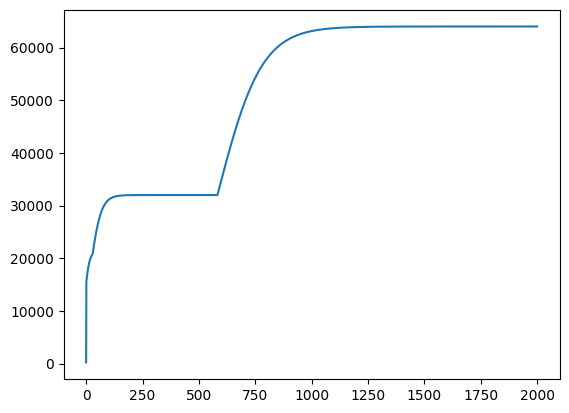

In [97]:
iteration = 2000
Pmaxs = []
tmaxs = []
n_row = 2
n_col = 2
thetas = np.ones(2 * num_qubits, dtype=np.complex128)
for i in range(iteration):
    h1 = base.hamiltonian.h1_2D(n_row, n_col, thetas)
    _, Pmax, tmax = base.gradient.find_Pmax_2D(h1, t = 6, delta_t = 0.001)
    Pmaxs.append(Pmax)
    tmaxs.append(tmax)
    grad_C = base.gradient.grad_Pmax_2D(n_row, n_column, tmax, thetas, h1)
    thetas += 10 * grad_C


plt.plot(range(0, iteration), Pmaxs, label=f"Pmaxs at {num_qubits} qubits")

In [89]:
h1 = base.hamiltonian.h1_2D(4, 2, np.ones(2 * 8, dtype=np.complex128))

Pmaxs at 2 x 2 qubits
[392.52626076-9.90515835e-13j 392.52626076+4.02281487e-13j
 392.52626076+3.18295313e-13j 392.52626076+8.03224913e-14j
   1.        +0.00000000e+00j   1.        +0.00000000e+00j
   1.        +0.00000000e+00j   1.        +0.00000000e+00j]
Pmaxs at 2 x 3 qubits
[392.52626076-9.90515835e-13j 392.52626076+4.02281487e-13j
 392.52626076+3.18295313e-13j 392.52626076+8.03224913e-14j
   1.        +0.00000000e+00j   1.        +0.00000000e+00j
   1.        +0.00000000e+00j   1.        +0.00000000e+00j
   1.        +0.00000000e+00j   1.        +0.00000000e+00j
   1.        +0.00000000e+00j   1.        +0.00000000e+00j]
Pmaxs at 3 x 2 qubits
[952.1233306 +2.99098180e-12j 952.1233306 +3.43422635e-12j
 286.61028761+1.17080364e-12j 286.61028761-6.25299300e-13j
 952.1233306 +3.32306376e-13j 952.1233306 +4.45429006e-13j
   1.        +0.00000000e+00j   1.        +0.00000000e+00j
   1.        +0.00000000e+00j   1.        +0.00000000e+00j
   1.        +0.00000000e+00j   1.        +0.00

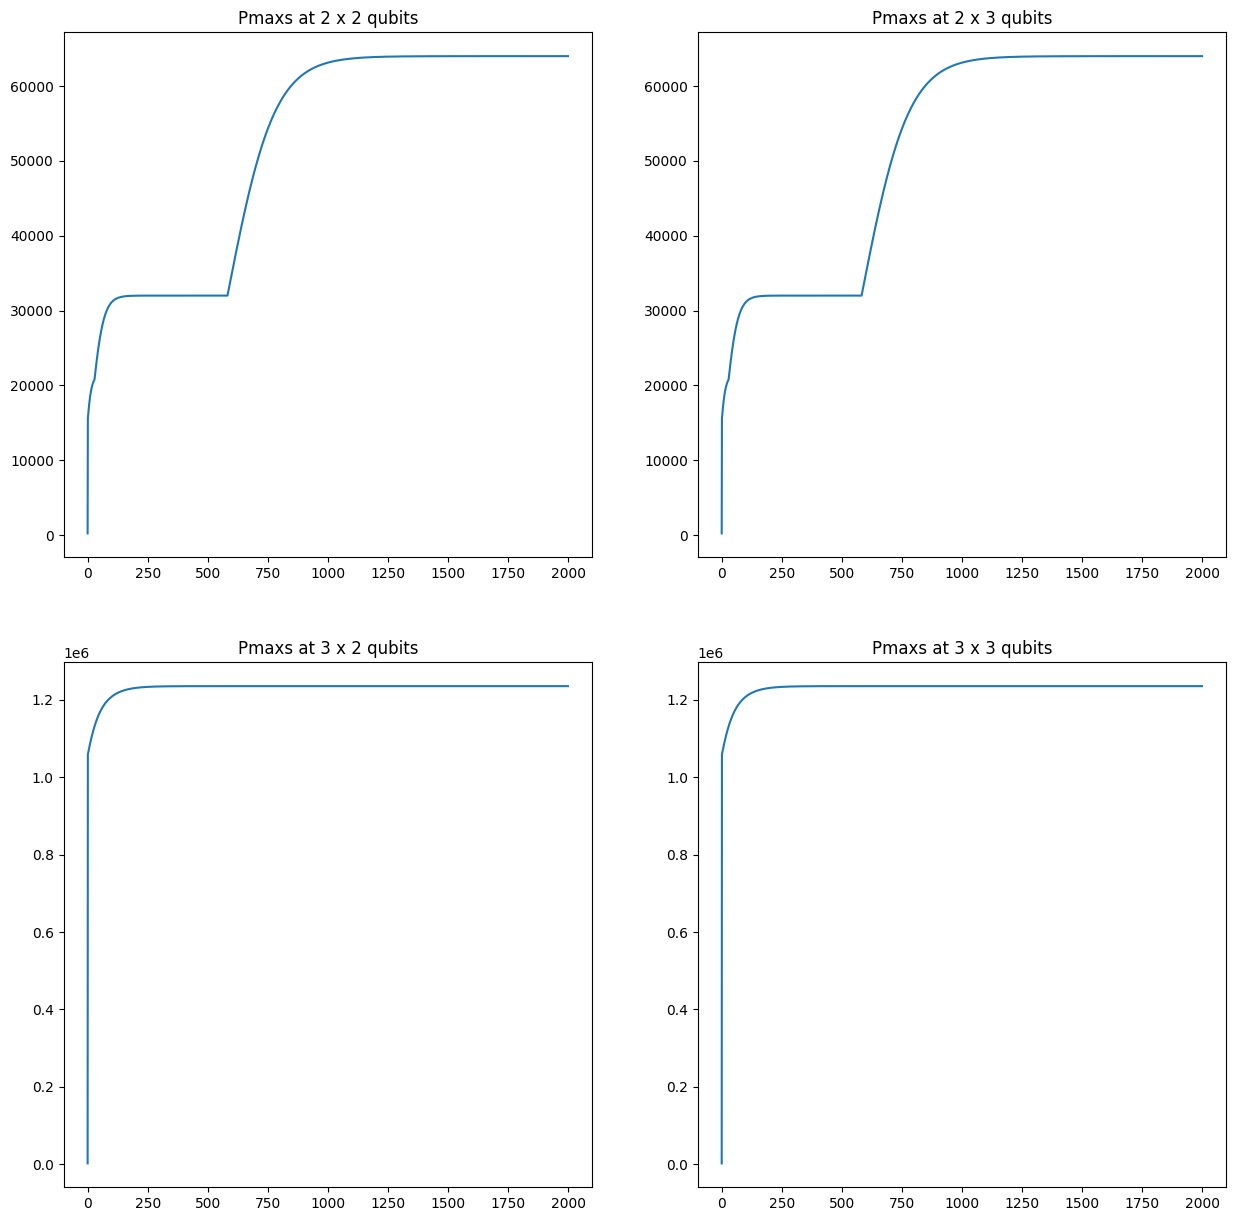

In [100]:
iteration = 2000




# n_row, n_col = 2,4
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
j = 0
for j, n_row in enumerate([2,3]):
    for k, n_col in enumerate([2,3]):
        Pmaxs = []
        tmaxs = []
        num_qubits = n_row * n_col
        thetas = np.ones(2 * num_qubits, dtype=np.complex128)
        print(f"Pmaxs at {n_row} x {n_col} qubits")
        for i in range(iteration):
            h1 = base.hamiltonian.h1_2D(n_row, n_column, thetas)
            _, Pmax, tmax = base.gradient.find_Pmax_2D(h1, t = 6, delta_t = 0.001)
            Pmaxs.append(Pmax)
            tmaxs.append(tmax)
            grad_C = base.gradient.grad_Pmax_2D(n_row, n_column, tmax, thetas, h1)
            thetas += 10 * grad_C
        print(thetas)
        ax[j, k].plot(range(0, iteration), Pmaxs, label=f"Pmaxs at {n_row} x {n_col} qubits")
        ax[j, k].set_title(f"Pmaxs at {n_row} x {n_col} qubits")

In [ ]:
600000 Ws => kWh

In [ ]:
def test(num_qubits, t1, h1, shots):
    """
    Return array time , W , P

    INPUT:
      t: time
      thetas: array parameter (length 2*(N-1))
      shots: number of measurement times

    """

    time = np.linspace(0, t1, shots)
    arrayW = []
    arrayP = []
    h0 = base.hamiltonian.h0(num_qubits, h=1)
    ps0 = base.object.psi_0(num_qubits)
    E0 = np.real((tq.daggx(ps0)) @ h0 @ ps0)[0, 0]
    print(E0)
    for t in time:
        w = 0
        p = 0
        if t != 0:
            w = base.object.E(t, h1, h0, ps0) - E0
            p = w / t

        print(w)
        arrayW.append(w)
        arrayP.append(p)

    return time, arrayP, arrayW


t = 2
h1 = base.hamiltonian.h1_2D(n_row, n_column, thetas)
ltime, arP, arW = test(num_qubits, t, h1, shots=1024)

max_value = np.max(arP)
max_index = np.argmax(arP)
max_time = ltime[max_index]
plt.plot(ltime, arW, label="Work")
plt.plot(ltime, arP, label="Power")
plt.xlabel("Time")
plt.ylabel("Value")
plt.scatter(max_time, max_value, color="red", label=f"Max: {np.round(max_value, 2)}")
plt.legend()
plt.show()